# First analysis

Vamos a inspeccionar un poco la información que tenemos para tener más ideas de por dónde ampliarla posteriormente.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
data = pd.read_csv("data/clean.csv")
data = data.drop('Unnamed: 0', axis=1)
data.head()

,country,year,sex,age_range,suicide_number,population,suicides/100k,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [6]:
data.suicide_number[4]

9

# Sex

In [12]:
f_suicide = 0
m_suicide = 0
for n in data.suicide_number:
    if data.sex[n] == 'female':
        f_suicide += n
    else:
        m_suicide += n
        
sex_suicide = [f_suicide,m_suicide]
sex_suicide

[3463271, 3285149]

Estos datos me parecen tan impactantes que voy a comprobar si se está sumando bien la columna.

In [8]:
data.suicide_number.sum()

6748420

Efectivamente se está sumnado bien. Hablamos de que entre 1985 y 2016 (**en 31 años**), se han registrado en estos países un total de **más de 6 millones y medio de suicidios**, en su mayoría de mujeres. Intentaremos ampliar los países recogidos en este dataset más tarde, pero ya he podido comprobar que añadiendo países como Rusia o China al estudio, la cifra asciende a 24 millones de suicidios en 30 años, una media de 800 mil al año.

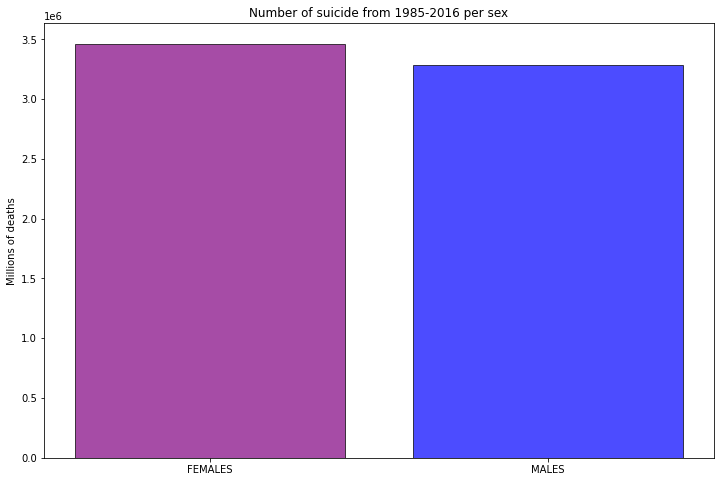

In [60]:
plt.figure(figsize=(12,8))
plt.ylabel("Millions of deaths")
plt.title('Number of suicide from 1985-2016 per sex')
plt.bar(['FEMALES','MALES'], sex_suicide, color=['purple','blue'],alpha = 0.7,edgecolor='black')


plt.show()


# Ages

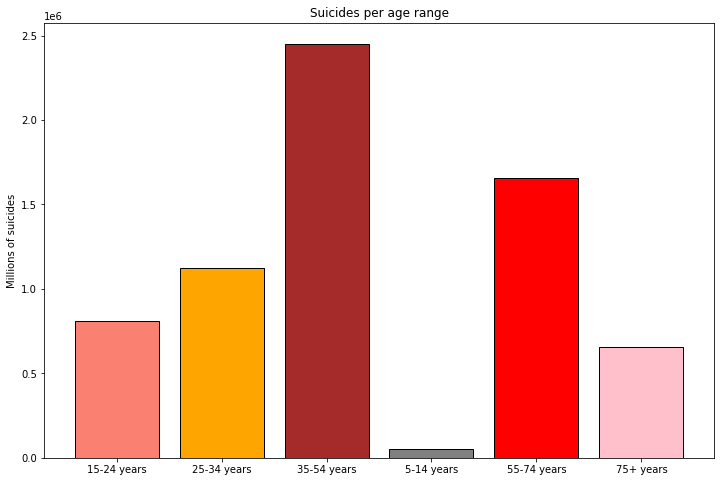

In [90]:
plt.figure(figsize=(12,8))
m = data.groupby('age_range').suicide_number.sum().reset_index()

plt.title("Suicides per age range")
plt.ylabel("Millions of suicides")
plt.bar(m.age_range, m.suicide_number,color=['salmon','orange', 'brown','grey','red','pink'],edgecolor='black')
plt.show()

# Countries

### Regions

In [102]:
nordic = ['Iceland','Norway','Sweden','Finland','Denmark']
central_eu = ['Netherlands','Austria','Luxembourg','Belgium','United Kingdom','Ireland','France','Bulgaria',
              'Ukraine','Romania','Germany','Poland']
north_america = ['United States','Canada']
south_america = ['Puerto Rico','Brazil','Chile','Ecuador','Argentina','Mexico','Colombia','Costa Rica','Guatemala',
                 'Saint Lucia','Uruguay','Belize','Suriname','Paraguay','Trinidad and Tobago','Cuba','Panama','Guyana','Barbados']
oceania = ['Australia','New Zealand']
south_eu = ['Italy','Greece','Malta','Spain','Portugal']
asia = ['Japan','Singapore','Republic of Korea','Israel','Turkmenistan','Thailand']

In [107]:
nordic_suicide = 0
central_eu_suicide = 0
north_america_suicide = 0
south_america_suicide = 0
oceania_suicide = 0
south_eu_suicide = 0
asia_suicide = 0

for n in data.suicide_number:
    if data.country[n] in nordic:
        nordic_suicide += n
    elif data.country[n] in central_eu:
        central_eu_suicide += n
    elif data.country[n] in north_america:
        north_america_suicide += n
    elif data.country[n] in south_america:
        south_america_suicide += n
    elif data.country[n] in oceania:
        oceania_suicide += n
    elif data.country[n] in south_eu:
        south_eu_suicide += n
    elif data.country[n] in asia:
        asia_suicide += n
        


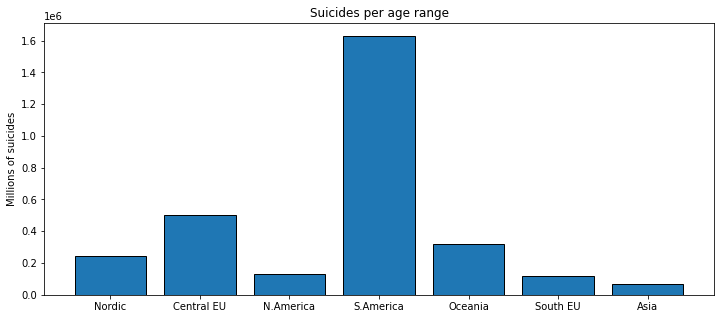

In [110]:
countries = [nordic_suicide,central_eu_suicide,north_america_suicide,
             south_america_suicide, oceania_suicide,south_eu_suicide,asia_suicide]        
countries_labels = ['Nordic','Central EU','N.America','S.America','Oceania','South EU','Asia']


plt.figure(figsize=(12,5))

plt.title("Suicides per age range")
plt.ylabel("Millions of suicides")
plt.bar(countries_labels, countries, edgecolor='black')
plt.show()

### Top 5

In [150]:
data[data['suicides/100k'] > 180].value_counts()

country            year  sex   age_range  suicide_number  population  suicides/100k  gdp_for_year       gdp_per_capita  generation     
Suriname           2012  male  75+ years  10              5346        187.06         4,980,000,000      10227           Silent             1
Seychelles         2006  male  75+ years  2               976         204.92         1,016,418,229      12442           Silent             1
Republic of Korea  2011  male  75+ years  1276            688365      185.37         1,202,463,682,634  25157           Silent             1
                   2010  male  75+ years  1152            631853      182.32         1,094,499,338,703  22994           Silent             1
Aruba              1995  male  75+ years  2               889         224.97         1,320,670,391      17949           G.I. Generation    1
dtype: int64

In [147]:
top.head()

country            year  sex   age_range  suicide_number  population  suicides/100k  gdp_for_year       gdp_per_capita  generation     
Suriname           2012  male  75+ years  10              5346        187.06         4,980,000,000      10227           Silent             1
Seychelles         2006  male  75+ years  2               976         204.92         1,016,418,229      12442           Silent             1
Republic of Korea  2011  male  75+ years  1276            688365      185.37         1,202,463,682,634  25157           Silent             1
                   2010  male  75+ years  1152            631853      182.32         1,094,499,338,703  22994           Silent             1
Aruba              1995  male  75+ years  2               889         224.97         1,320,670,391      17949           G.I. Generation    1
dtype: int64

In [154]:
top = {'country':  ['Aruba', 'Seychelles','Suriname','Republic of Korea','Republic of Korea'],
       'year': [1995, 2006,2012,2011,2010],
       'suicide per 100k': [224.97, 204.92,187.06,185.37,182.32],
        }

df = pd.DataFrame (top, columns = ['country','year','suicide per 100k'])

df


,country,year,suicide per 100k
0,Aruba,1995,224.97
1,Seychelles,2006,204.92
2,Suriname,2012,187.06
3,Republic of Korea,2011,185.37
4,Republic of Korea,2010,182.32


# Years

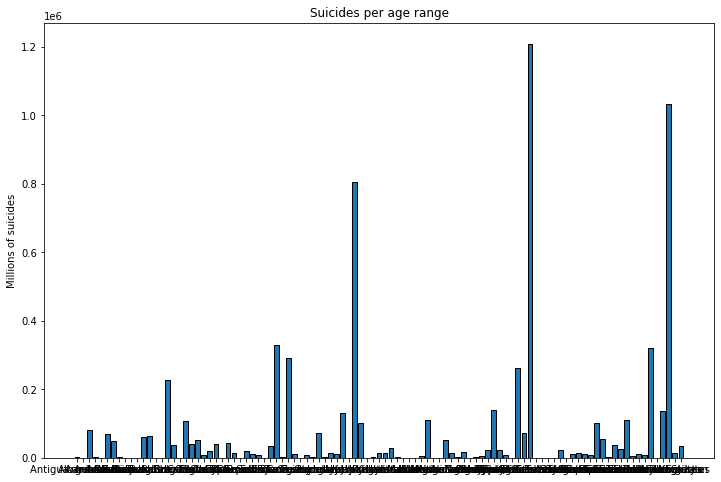

In [93]:
plt.figure(figsize=(12,8))
m = data.groupby('country').suicide_number.sum().reset_index()

plt.title("Suicides per age range")
plt.ylabel("Millions of suicides")
plt.bar(m.country, m.suicide_number,edgecolor='black')
plt.show()

# GDP per year